# Equity Returns Analysis Project

We will use price data from last year (Feb 2023 - to date) of three equities Google (GOOGL), Bank of America (BAC) and Delta Air Lines (DAL)

## Objectives
- Compute returns data
- Compute annualized return, annualized volatility and sharpe ratio
- Compute maximum drawdown
- Compute skewness and kurtosis
- Compute semideviation
- Compute VaR and continuous VaR metrics

In [1]:
import numpy as np
import pandas as pd
import scipy.stats

## Compute Returns Data

In [19]:
def get_returns(ticker):
    """
    Read price data for a specified ticker, compute returns, rename columns
    Returns DataFrame
    """
    data = pd.read_csv('gh_data/{}.csv'.format(ticker), header=0, index_col=0, parse_dates=True, na_values=-99.99)
    columns = ['Adj Close']
    data = data[columns]
    data.index = pd.to_datetime(data.index, format="%Y%m%d")
    data['Returns'] = data.pct_change()
    data.dropna(inplace=True)
    data.columns = ['{} Adj Close'.format(ticker), '{} Returns'.format(ticker)]
    return data

In [23]:
dal_data = get_returns('DAL')
bac_data = get_returns('BAC')
googl_data = get_returns('GOOGL')

In [27]:
data = pd.DataFrame({
        "DAL Returns": dal_data['DAL Returns'],
        "BAC Returns": bac_data['BAC Returns'],
        "GOOGL Returns": googl_data['GOOGL Returns']
    })

In [30]:
data.to_csv('gh_data/returns_data.csv')

<Axes: title={'center': 'Distribution of returns of DAL, BAC and GOOGL'}, ylabel='Frequency'>

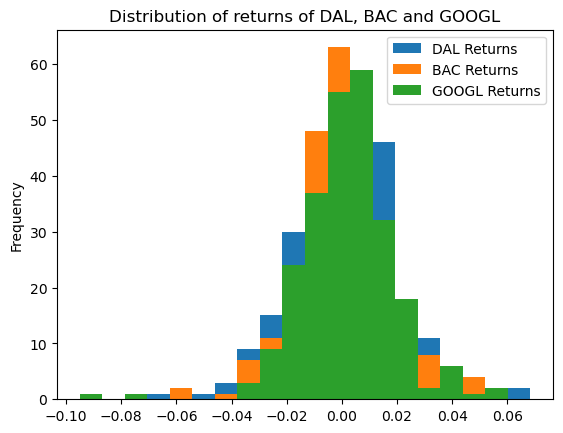

In [62]:
data.plot.hist(bins=20, title="Distribution of returns of DAL, BAC and GOOGL")

## Compute Annualized Return, Annualized Volatility and Sharpe Ratio

In [34]:
data.mean()

DAL Returns      0.000488
BAC Returns      0.000129
GOOGL Returns    0.001760
dtype: float64

This shows Google had the highest average (mean) daily return and BAC the lowest

In [36]:
volatility = data.std()
volatility

DAL Returns      0.019705
BAC Returns      0.017152
GOOGL Returns    0.017357
dtype: float64

In [37]:
volatility_ann = volatility * np.sqrt(12)
volatility_ann

DAL Returns      0.068259
BAC Returns      0.059415
GOOGL Returns    0.060127
dtype: float64

In [42]:
return_ann= (data + 1).prod() - 1
return_ann

DAL Returns      0.076309
BAC Returns     -0.004228
GOOGL Returns    0.494817
dtype: float64

In [43]:
risk_free_rate = 0.03

In [45]:
sharpe_ratio = (return_ann - risk_free_rate)/volatility_ann
sharpe_ratio

DAL Returns      0.385431
BAC Returns     -0.912710
GOOGL Returns    7.397984
dtype: float64

# Compute Maximum Drawdown

In [46]:
cumulative_returns = 1000 * (1+data).cumprod()

In [47]:
cumulative_returns.head()

,DAL Returns,BAC Returns,GOOGL Returns
Date,,,
2023-02-17,1002.089956,1001.984236,987.854633
2023-02-21,969.174511,978.458221,961.051189
2023-02-22,966.823406,971.938884,959.585385
2023-02-23,980.407554,971.088518,951.628071
2023-02-24,975.966598,969.671436,933.200661


<Axes: xlabel='Date'>

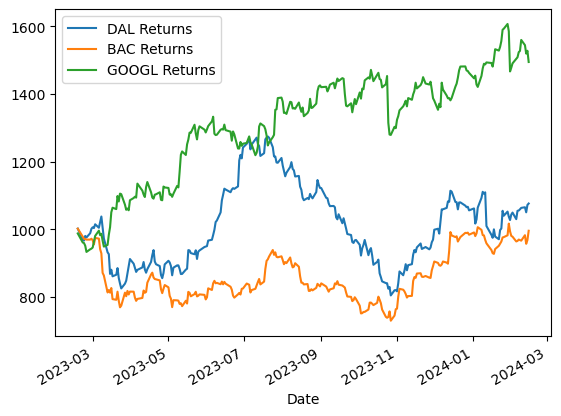

In [49]:
cumulative_returns.plot.line()

In [50]:
peaks = cumulative_returns.cummax()

<Axes: xlabel='Date'>

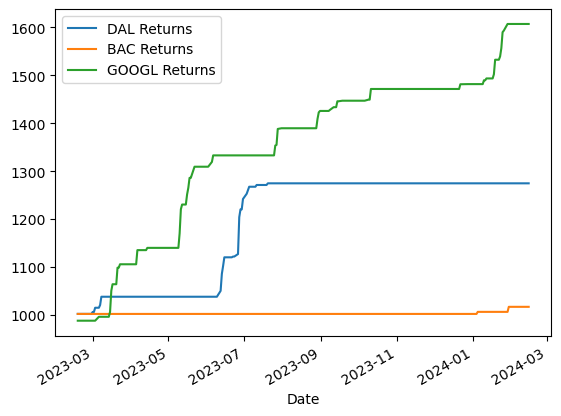

In [51]:
peaks.plot()

In [52]:
drawdown = (cumulative_returns - peaks)/peaks

<Axes: xlabel='Date'>

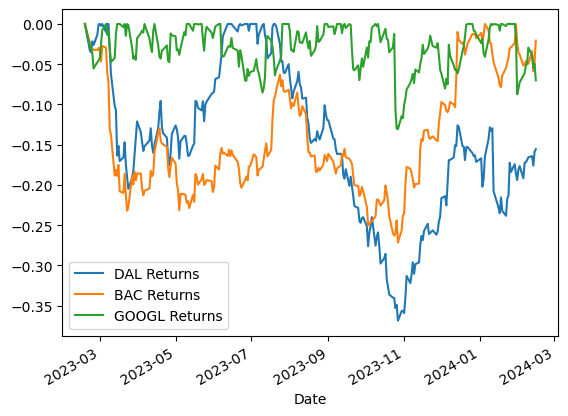

In [53]:
drawdown.plot()

In [54]:
drawdown.min()

DAL Returns     -0.368745
BAC Returns     -0.271621
GOOGL Returns   -0.130772
dtype: float64

In [55]:
drawdown.idxmin()

DAL Returns     2023-10-27
BAC Returns     2023-10-27
GOOGL Returns   2023-10-27
dtype: datetime64[ns]

This analysis shows that DAL had a ~37% drawdown last year which was the largest out of the three stocks. All three stocks had their largest drawdowns on the same day

In [56]:
dal_drawdown = pd.DataFrame({
    'Cumulative': cumulative_returns['DAL Returns'],
    'Peaks': peaks['DAL Returns']
})

<Axes: xlabel='Date'>

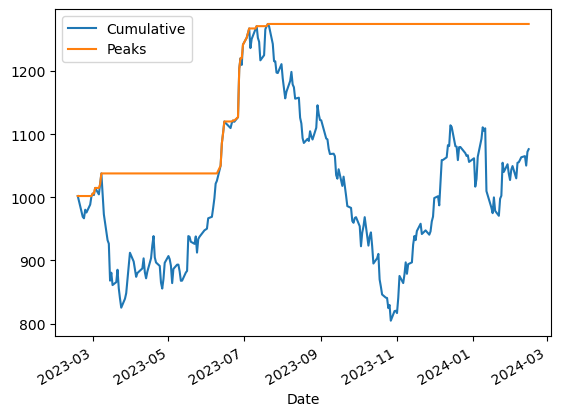

In [57]:
dal_drawdown.plot()

In [60]:
googl_drawdown = pd.DataFrame({
    'Cumulative': cumulative_returns['GOOGL Returns'],
    'Peaks': peaks['GOOGL Returns']
})

<Axes: xlabel='Date'>

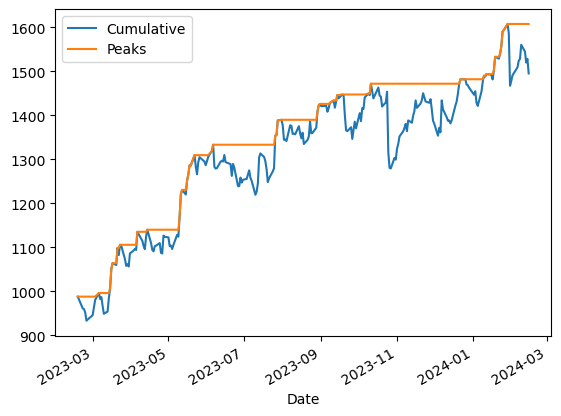

In [61]:
googl_drawdown.plot()

## Compute Skewness and Kurtosis